In [1]:
import geopandas as gpd

# Получение границы СФО для дальнейших операций

In [4]:
df = gpd.read_file("./data/admin_level_3.shp", encoding="cp1251")
df.head()

,name,note,source,boundary,admin_leve,name_ca,name_de,name_en,name_es,name_fr,...,name_lt,populati_1,name_ja,name_pt,name_sv,name_vi,name_zh,int_name,timezone,geometry
0,урочище Ишмик,эксклав Ишмик,Яндекс,administrative,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((38.72653 58.77856, 38.71925 58.77569..."
1,урочище Ишмик,эксклав Ишмик,Яндекс,administrative,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((38.72653 58.77856, 38.71925 58.77569..."
2,Крымский федеральный округ,NaN,NaN,administrative,3,Districte Federal de Crimea,Foderationskreis Krim,Crimean Federal District,Distrito federal de Crimea,District federal de Crimee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((36.68157 45.45661, 36.66350 45.35994..."
3,Уральский федеральный округ,NaN,NaN,administrative,3,Districte Federal dels Urals,Foderationskreis Ural,Ural Federal District,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((86.00729 64.27208, 86.00555 64.25572..."
4,Северо-Западный федеральный округ,NaN,NaN,administrative,3,Districte Federal del Nord-oest,Foderationskreis Nordwest,Northwestern Federal District,NaN,District federal du Nord-Ouest,...,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((37.97560 80.13514, 37.96434 80..."


In [9]:
sfo = df[df.name == "Северо-Западный федеральный округ"]
sfo

,name,note,source,boundary,admin_leve,name_ca,name_de,name_en,name_es,name_fr,...,name_lt,populati_1,name_ja,name_pt,name_sv,name_vi,name_zh,int_name,timezone,geometry
4,Северо-Западный федеральный округ,NaN,NaN,administrative,3,Districte Federal del Nord-oest,Foderationskreis Nordwest,Northwestern Federal District,NaN,District federal du Nord-Ouest,...,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((37.97560 80.13514, 37.96434 80..."


In [10]:
sfo.to_file("./data/sfo.shp")

# Получение МЛТ по СФО

In [7]:
sfo = gpd.read_file('./data/sfo.shp')

In [5]:
ifl = gpd.read_file("./data/ifl_2020.shp")
ifl.head()

,IFL_ID,AREA2020,geometry
0,SAM_5,65274.707861,"POLYGON ((-71.91393 -53.86099, -71.91197 -53.8..."
1,SAM_6,86754.365400,"POLYGON ((-70.74540 -53.84428, -70.74445 -53.8..."
2,SAM_8,94301.319669,"POLYGON ((-72.76696 -53.51801, -72.76418 -53.5..."
3,SAM_9,424176.259894,"POLYGON ((-71.41346 -53.16853, -71.41315 -53.1..."
4,SAM_10,296412.317874,"POLYGON ((-72.14528 -52.67718, -72.14473 -52.6..."


In [8]:
ifl_in_sfo = ifl.sjoin(sfo)

In [9]:
ifl_in_sfo.shape

(47, 40)

In [10]:
ifl_in_sfo.head()

,IFL_ID,AREA2020,geometry,index_right,name,note,source,boundary,admin_leve,name_ca,...,name_be,name_lt,populati_1,name_ja,name_pt,name_sv,name_vi,name_zh,int_name,timezone
1511,NEA_180,2.356453e+06,"POLYGON ((39.32640 67.08130, 39.32827 67.08297...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1512,NEA_167,1.708410e+05,"POLYGON ((51.53617 64.48907, 51.57778 64.48839...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,NEA_139,6.740814e+05,"POLYGON ((46.63900 64.80650, 46.63798 64.80635...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,NEA_131,1.438879e+05,"POLYGON ((57.31221 64.36849, 57.31269 64.36871...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,NEA_127,3.217195e+05,"POLYGON ((46.45115 64.05951, 46.45224 64.05949...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ifl_in_sfo[['IFL_ID', 'AREA2020', 'geometry']].to_file('./data/ifl_in_sfo_2020.shp')

<Axes: >

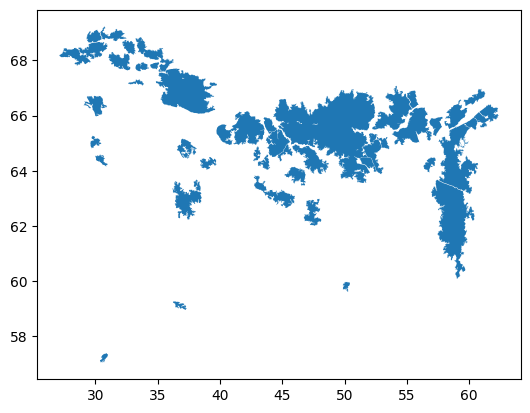

In [14]:
ifl_in_sfo.plot()

In [15]:
ifl_in_sfo.bounds

,minx,miny,maxx,maxy
1511,34.855427,66.065079,39.760146,67.714699
1512,51.216740,63.958622,52.559048,64.489738
1514,45.795540,63.871407,48.738232,64.954369
1515,56.343555,63.934555,57.323883,64.484253
1516,45.155155,63.449429,46.875838,64.142838
1521,58.015461,65.506088,59.867985,66.578705
1522,60.373699,65.570442,62.393112,66.411697
1535,39.723141,64.931741,43.601059,66.159210
1537,56.805992,65.258873,57.895329,65.953268
1538,59.608547,65.472870,60.662437,65.928535


In [17]:
ifl_in_sfo.bounds.to_csv('./data/ifl_bboxes.csv')

In [19]:
bounds = ifl_in_sfo.bounds

In [18]:
from requests import get

In [45]:
r = bounds.iloc[0, :]
r

minx    34.855427
miny    66.065079
maxx    39.760146
maxy    67.714699
Name: 1511, dtype: float64

In [46]:
response = get(
    f'http://192.168.1.62:8888/mapservices/oodb?request=apioodb&version=1.0.0&apioodbtype=loadobj&bbox={r.minx},{r.miny},{r.maxx},{r.maxy}')

In [66]:
f'http://192.168.1.62:8888/mapservices/oodb?request=apioodb&version=1.0.0&apioodbtype=loadobj&bbox={r.minx},{r.miny},{r.maxx},{r.maxy}'

'http://192.168.1.62:8888/mapservices/oodb?request=apioodb&version=1.0.0&apioodbtype=loadobj&bbox=34.85542678861543,66.06507873609485,39.760146455994175,67.71469879171593'

In [48]:
all_objs = response.json()

In [49]:
all_objs.keys()

dict_keys(['features', 'type'])

In [50]:
len(all_objs['features'])

5171

In [51]:
all_objs['features'][0].keys()

dict_keys(['geometry', 'id', 'properties', 'type'])

In [52]:
all_objs['features'][0]['properties']

{'013': 'Каменик',
 'pidOOODBAttr_classCode': '60800',
 'pidOOODBAttr_commitIDFeat': '4',
 'pidOOODBAttr_commitIDGeom': '0',
 'pidOOODBAttr_featureID': '1934833',
 'pidOOODBAttr_geomID': '29205879'}

In [53]:
response = get(
    f'http://192.168.1.62:8888/mapservices/oodb?request=apioodb&version=1.0.0&apioodbtype=catalog')

In [54]:
response.json()

{'attributes': {'001': {'alias': 'Признак судоходства',
   'defValue': '0.0',
   'domain': {'name': 'Признак судоходства',
    'type': 1,
    'vals': {'100': 'Судоходный', '200': 'Несудоходный'}},
   'key': '001',
   'name': 'navigability',
   'precision': 15,
   'type': 1},
  '002': {'alias': 'Тип водоема',
   'defValue': '0.0',
   'domain': {'name': 'Тип водоема',
    'type': 1,
    'vals': {'100': 'Океан',
     '200': 'Море',
     '300': 'Озеро',
     '400': 'Пруд',
     '500': 'Бассейн',
     '600': 'Площадь разлива реки (озера)',
     '700': 'Водохранилище'}},
   'key': '002',
   'name': 'pondType',
   'precision': 15,
   'type': 1},
  '003': {'alias': 'Происхождение',
   'defValue': '0.0',
   'domain': {'name': 'Происхождение',
    'type': 1,
    'vals': {'100': 'Естественное', '200': 'Искусственное'}},
   'key': '003',
   'name': 'origin',
   'precision': 15,
   'type': 1},
  '004': {'alias': 'Качественные особенности воды',
   'defValue': '0.0',
   'domain': {'name': 'Качествен

In [55]:
response.json().keys()

dict_keys(['attributes', 'classes', 'styles'])

In [56]:
response.json()['classes']

{'10000': {'alias': 'Гидрография',
  'attributes': ['225', '138', '211', '013', '224', '077'],
  'classCode': '10000',
  'drawOrder': 50,
  'name': 'gydro',
  'parent': ''},
 '10100': {'alias': 'Водоем',
  'attributes': ['225',
   '138',
   '211',
   '013',
   '224',
   '077',
   '196',
   '195',
   '010',
   '038',
   '002',
   '003',
   '007',
   '004',
   '005',
   '006',
   '001'],
  'classCode': '10100',
  'drawOrder': 46,
  'name': 'pond',
  'parent': '10000'},
 '10101': {'alias': 'Водохранилище',
  'attributes': ['225',
   '138',
   '211',
   '013',
   '224',
   '077',
   '196',
   '195',
   '010',
   '038',
   '002',
   '003',
   '007',
   '004',
   '005',
   '006',
   '001',
   '138',
   '187',
   '014',
   '216'],
  'classCode': '10101',
  'drawOrder': 44,
  'name': 'waterReservoir',
  'parent': '10100'},
 '10200': {'alias': 'Водоток',
  'attributes': ['225',
   '138',
   '211',
   '013',
   '224',
   '077',
   '003',
   '196',
   '195',
   '011',
   '038',
   '010',
   '036'

In [60]:
response.json()['attributes']

{'001': {'alias': 'Признак судоходства',
  'defValue': '0.0',
  'domain': {'name': 'Признак судоходства',
   'type': 1,
   'vals': {'100': 'Судоходный', '200': 'Несудоходный'}},
  'key': '001',
  'name': 'navigability',
  'precision': 15,
  'type': 1},
 '002': {'alias': 'Тип водоема',
  'defValue': '0.0',
  'domain': {'name': 'Тип водоема',
   'type': 1,
   'vals': {'100': 'Океан',
    '200': 'Море',
    '300': 'Озеро',
    '400': 'Пруд',
    '500': 'Бассейн',
    '600': 'Площадь разлива реки (озера)',
    '700': 'Водохранилище'}},
  'key': '002',
  'name': 'pondType',
  'precision': 15,
  'type': 1},
 '003': {'alias': 'Происхождение',
  'defValue': '0.0',
  'domain': {'name': 'Происхождение',
   'type': 1,
   'vals': {'100': 'Естественное', '200': 'Искусственное'}},
  'key': '003',
  'name': 'origin',
  'precision': 15,
  'type': 1},
 '004': {'alias': 'Качественные особенности воды',
  'defValue': '0.0',
  'domain': {'name': 'Качественные особенности воды',
   'type': 1,
   'vals': {'

In [57]:
cls = response.json()['classes']

In [58]:
id_to_alias = {k: cls[k]['alias'] for k in cls}

In [59]:
id_to_alias

{'10000': 'Гидрография',
 '10100': 'Водоем',
 '10101': 'Водохранилище',
 '10200': 'Водоток',
 '10201': 'Канал, канава',
 '10300': 'Водоисточник',
 '10400': 'Участок водной поверхности',
 '20000': 'Дорожная сеть',
 '20100': 'Автомобильная дорога',
 '20200': 'Железнодорожный путь',
 '20300': 'Пешеходная дорога',
 '20400': 'Канатная дорога',
 '30000': 'Растительность',
 '30100': 'Водная растительность',
 '30200': 'Древесная растительность',
 '30300': 'Кустарниковая растительность',
 '30400': 'Моховая и лишайниковая растительность',
 '30500': 'Полукустарниковая и кустарничковая растительность',
 '30600': 'Травянистая растительность',
 '30700': 'Культурная растительность',
 '30800': 'Просека',
 '40000': 'Административно-территориальное деление',
 '40100': 'Административная граница',
 '40200': 'Пограничный знак',
 '40300': 'Территория административной единицы',
 '50000': 'Населенный пункт',
 '50100': 'Квартал',
 '60000': 'Участок земной поверхности',
 '60100': 'Территория землепользования',


In [65]:
all_objs['features'][0]

{'geometry': {'coordinates': [35.34084139999974, 67.52301980000011],
  'type': 'Point'},
 'id': 1934833,
 'properties': {'013': 'Каменик',
  'pidOOODBAttr_classCode': '60800',
  'pidOOODBAttr_commitIDFeat': '4',
  'pidOOODBAttr_commitIDGeom': '0',
  'pidOOODBAttr_featureID': '1934833',
  'pidOOODBAttr_geomID': '29205879'},
 'type': 'Feature'}

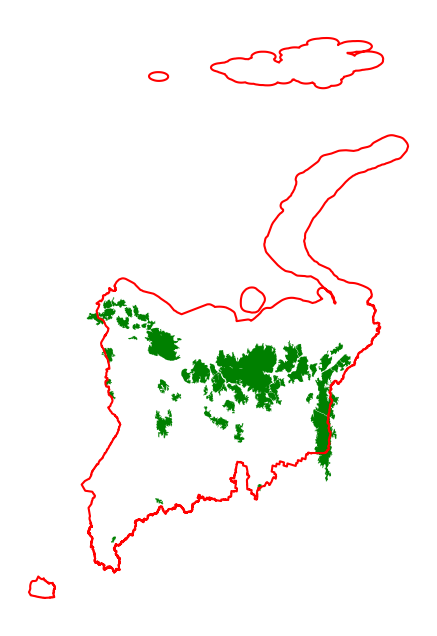

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ifl_in_sfo.plot(ax=ax, color='green')
sfo.boundary.plot(ax=ax, color='red')
ax.set_axis_off()
plt.show()

In [71]:
ifl_clipped = ifl_in_sfo.clip(sfo.geometry)

In [72]:
ifl_clipped.head()

,IFL_ID,AREA2020,geometry,index_right,name,note,source,boundary,admin_leve,name_ca,...,name_be,name_lt,populati_1,name_ja,name_pt,name_sv,name_vi,name_zh,int_name,timezone
1555,NEA_65,70892.887263,"POLYGON ((50.36595 59.83011, 50.36496 59.83004...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571,NEA_111,406423.179891,"POLYGON ((47.15259 62.56034, 47.15214 62.56038...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,NEA_123_2,850339.708451,"POLYGON ((36.48513 63.58941, 36.48571 63.58943...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558,NEA_126,595959.430705,"POLYGON ((44.54901 63.21301, 44.54827 63.21281...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734,NEA_123_1,71422.846405,"POLYGON ((38.18072 63.49380, 38.18194 63.49382...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
ifl_clipped[['IFL_ID', 'AREA2020', 'geometry']].to_file('./data/ifl_in_sfo_2020.shp')

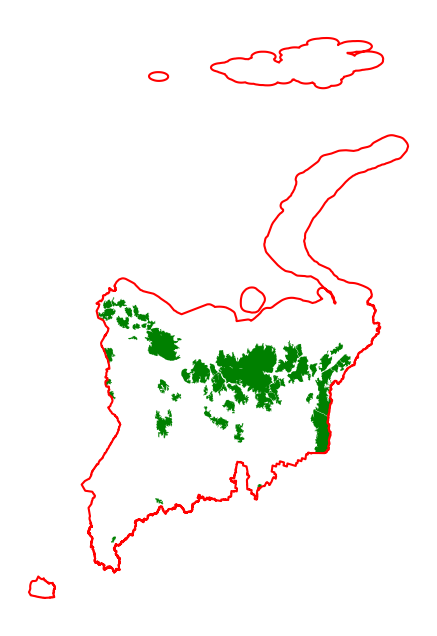

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))
ifl_clipped.plot(ax=ax, color='green')
sfo.boundary.plot(ax=ax, color='red')
ax.set_axis_off()
plt.show()

In [4]:
ifl_clipped = gpd.read_file('./data/ifl_in_sfo_2020.shp')

In [19]:
from api.request_helper import APIRequestHelper

helper = APIRequestHelper("http://192.168.1.62:8888/mapservices/oodb")

In [100]:
all_features_to_update = []

In [95]:
from api.util import filter_by_class

In [96]:
from tqdm import tqdm

Ошибка 504 на ID: 33, 42
Как исправить: поделить на несколько прямоугольников

In [73]:
def split_rectangle_in_4(rect: tuple):
    x1, y1, x2, y2 = rect
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    rect1 = (x1, y1, mid_x, mid_y)
    rect2 = (x1, mid_y, mid_x, y2)
    rect3 = (mid_x, y1, x2, mid_y)
    rect4 = (mid_x, mid_y, x2, y2)

    return rect1, rect2, rect3, rect4

In [ ]:
tree_class_id = '30[2-6]00'
for _, roi in tqdm(ifl_clipped.bounds.iterrows(), desc='ifls'):
    for big_rect in split_rectangle_in_4(tuple(roi.iloc[:])):
        for rect in split_rectangle_in_4(big_rect):
            print(rect)
            bbox = ','.join(map(str, rect))
            tree_feats = filter_by_class(tree_class_id, helper.load_object(bbox=bbox))
            all_features_to_update.extend(tree_feats)

In [102]:
len(all_features_to_update)

21722

In [103]:
unique_feats = []
all_features_to_update.sort(key=lambda f: f.id)

prev_id = None
for f in all_features_to_update:
    if f.id == prev_id:
        continue
    unique_feats.append(f)
    prev_id = f.id

In [104]:
len(unique_feats)

17342

In [105]:
from geojson_pydantic import FeatureCollection

fc = FeatureCollection(features=unique_feats)
with open('dump.geojson', 'w') as out:
    out.write(fc.json(by_alias=True, exclude_none=True))

In [2]:
trees = gpd.read_file('dump.geojson')
trees.head()

,id,pidOOODBAttr_classCode,pidOOODBAttr_featureID,geometry
0,1581732,30200,1581732,"POLYGON ((33.27395 68.62700, 33.27504 68.62658..."
1,1581733,30200,1581733,"POLYGON ((33.27708 68.62915, 33.27787 68.62889..."
2,1581734,30200,1581734,"POLYGON ((33.29081 68.64434, 33.29198 68.64316..."
3,1581735,30200,1581735,"POLYGON ((33.28314 68.62794, 33.28371 68.62787..."
4,1581736,30200,1581736,"POLYGON ((33.28340 68.63456, 33.28342 68.63442..."


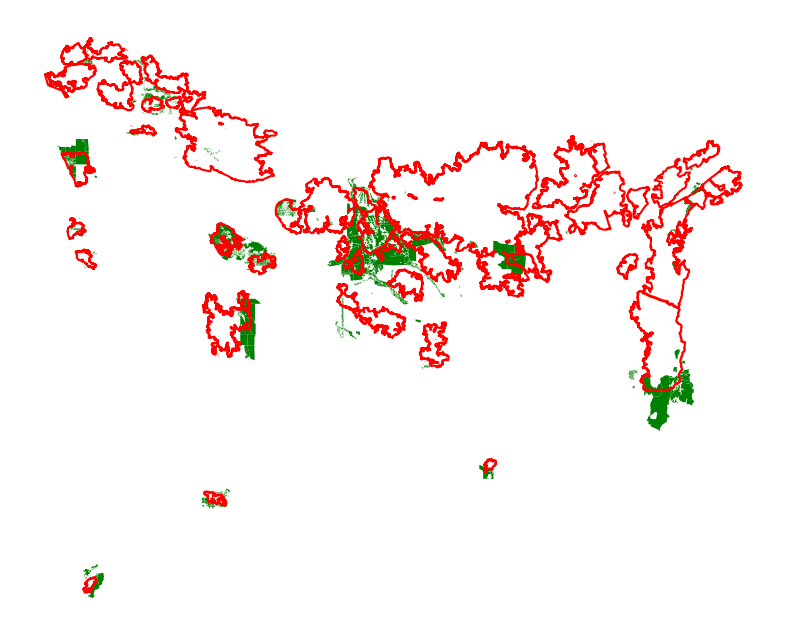

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
trees.plot(ax=ax, color='green')
ifl_clipped.boundary.plot(ax=ax, color='red')
ax.set_axis_off()
plt.show()

In [6]:
filtered_trees = trees.sjoin(ifl_clipped)
filtered_trees.shape

(6514, 7)

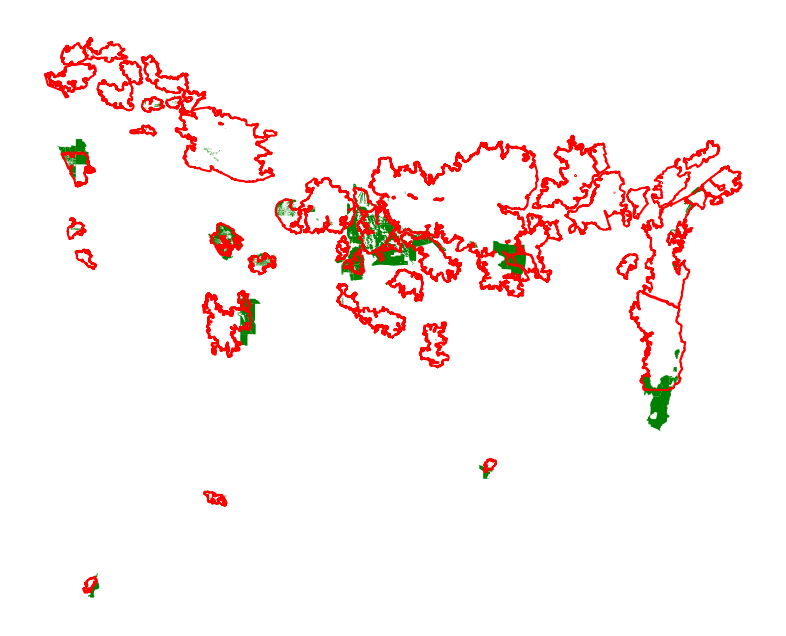

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
filtered_trees.plot(ax=ax, color='green')
ifl_clipped.boundary.plot(ax=ax, color='red')
ax.set_axis_off()
plt.show()

In [9]:
filtered_trees.to_file('dump_filtered_all.geojson')

In [10]:
filtered_trees.head()

,id,pidOOODBAttr_classCode,pidOOODBAttr_featureID,geometry,index_right,IFL_ID,AREA2020
10,1581819,30200,1581819,"POLYGON ((33.31677 67.29949, 33.31683 67.29941...",16,NEA_178,55172.863338
27,1581985,30200,1581985,"POLYGON ((33.40895 67.26390, 33.40898 67.26381...",16,NEA_178,55172.863338
987,1586715,30200,1586715,"POLYGON ((33.47667 67.23545, 33.47693 67.23443...",16,NEA_178,55172.863338
999,1587957,30200,1587957,"POLYGON ((33.39316 67.15518, 33.39348 67.15476...",16,NEA_178,55172.863338
1014,1588479,30200,1588479,"POLYGON ((33.47008 67.23194, 33.47129 67.23130...",16,NEA_178,55172.863338


In [11]:
filtered_trees.pidOOODBAttr_classCode.value_counts()

pidOOODBAttr_classCode
30200    5978
30300     303
30600     233
Name: count, dtype: int64

In [12]:
clipped_trees = filtered_trees.clip(ifl_clipped.geometry)

In [13]:
clipped_trees.head()

,id,pidOOODBAttr_classCode,pidOOODBAttr_featureID,geometry,index_right,IFL_ID,AREA2020
6035,1658133,30200,1658133,"MULTIPOLYGON (((30.67097 57.05589, 30.67092 57...",10,NEA_30,71453.199931
14586,1804168,30200,1804168,"MULTIPOLYGON (((31.01575 57.31251, 31.01639 57...",10,NEA_30,71453.199931
9655,1730646,30200,1730646,"POLYGON ((30.93222 57.23103, 30.93245 57.23129...",10,NEA_30,71453.199931
1367,1595590,30200,1595590,"MULTIPOLYGON (((30.96300 57.25946, 30.96304 57...",10,NEA_30,71453.199931
1368,1595591,30200,1595591,"POLYGON ((30.98129 57.27177, 30.98148 57.27173...",10,NEA_30,71453.199931


In [14]:
clipped_trees[clipped_trees.pidOOODBAttr_classCode == '30200'].shape

(5978, 7)

In [15]:
clipped_trees[clipped_trees.pidOOODBAttr_classCode == '30200'].to_file('./data/trees_in_ifl.shp')

/tmp/ipykernel_5158/523078182.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clipped_trees[clipped_trees.pidOOODBAttr_classCode == '30200'].to_file('./data/trees_in_ifl.shp')


# Векторизация территорий, потерявших лесной покров в 20-21 году

In [1]:
import os

# set the input directory and output file name
input_dir = './data/forest_loss'
# get the list of all GeoTIFF files in the input directory
raster_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.tif')]

In [2]:
len(raster_files)

231

In [83]:
import rasterio
from rasterio.features import shapes
from geojson_pydantic import Feature
from tqdm import tqdm

results: list[Feature] = []

for raster in tqdm(raster_files[-10:], desc='files'):
    with rasterio.open(raster) as src:
        chunk_size = src.width // 8
        width = src.width
        height = src.height

        # Loop through each chunk
        for i in range(0, width, chunk_size):
            for j in range(0, height, chunk_size):
                # Define window parameters
                window = rasterio.windows.Window(i, j, chunk_size, chunk_size)

                # Read chunk of raster image
                image = src.read(1, window=window)
                transform = rasterio.windows.transform(window, src.transform)

                # Convert raster image to geometry
                for s, v in shapes(image, mask=image, transform=transform):
                    results.append(Feature(**{'properties': {'raster_val': v}, 'geometry': s}))

files: 100%|██████████| 10/10 [03:57<00:00, 23.74s/it]


In [86]:
from geojson_pydantic import FeatureCollection

fc = FeatureCollection(features=results)
with open('forest_change.geojson', 'w') as out:
    out.write(fc.json(by_alias=True, exclude_none=True))

In [18]:
forest_change = gpd.read_file('forest_change.geojson')

In [26]:
forest_change.head()

,raster_val,geometry
0,1.0,"POLYGON ((33.68736 68.81383, 33.68736 68.81356..."
1,1.0,"POLYGON ((32.58809 67.85119, 32.58809 67.85065..."
2,1.0,"POLYGON ((32.55495 67.84930, 32.55495 67.84903..."
3,1.0,"POLYGON ((33.84556 67.72884, 33.84556 67.72857..."
4,1.0,"POLYGON ((33.84663 67.72830, 33.84663 67.72803..."


# Упрощение полученных геометрий

/tmp/ipykernel_6800/738648895.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  idx = forest_change[forest_change.geometry.area == forest_change.geometry.area.max()].index[0]


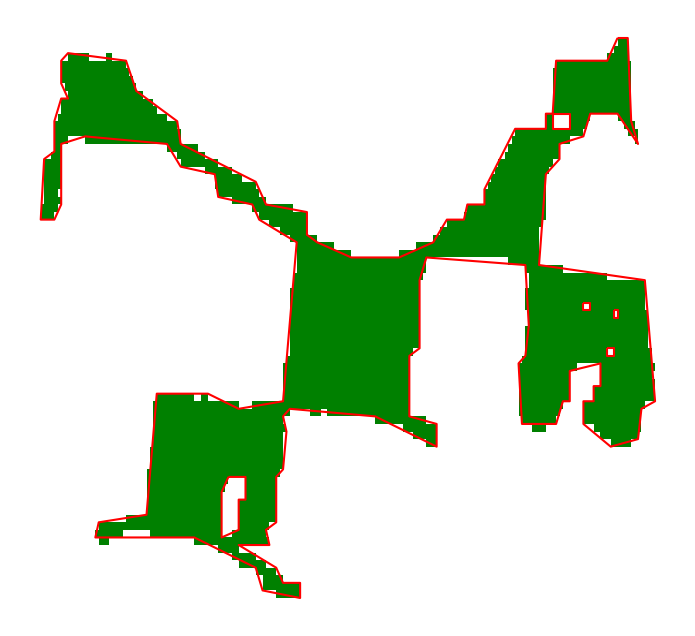

In [65]:
from shapely import simplify
import matplotlib.pyplot as plt

idx = forest_change[forest_change.geometry.area == forest_change.geometry.area.max()].index[0]
fig, ax = plt.subplots(figsize=(12, 8))
forest_change[idx:idx+1].plot(ax=ax, color='green')
forest_change[idx:idx+1].geometry.apply(lambda g: simplify(g, tolerance=0.0003,
                               preserve_topology=True)).boundary.plot(ax=ax, color='red')
ax.set_axis_off()
plt.show()

# Обновление существующих данных

In [27]:
clipped_trees = gpd.read_file('./data/dump_with_attrs.geojson')

In [31]:
clipped_trees.sjoin(forest_change[531:532])

,id,pidOOODBAttr_classCode,pidOOODBAttr_featureID,pidOOODBAttr_commitIDFeat,pidOOODBAttr_commitIDGeom,013,050,pidOOODBAttr_geomID,geometry,index_right,raster_val
2984,1718791,30200,1718791,2,2,NaN,100,19312913,"POLYGON ((38.37851 63.09453, 38.53125 63.09346...",531,1.0
5218,1718791,30200,1718791,2,2,NaN,100,19312913,"POLYGON ((38.37851 63.09453, 38.53125 63.09346...",531,1.0


In [135]:
import pandas as pd

updated_trees = gpd.GeoDataFrame(columns=clipped_trees.columns)
for idx in tqdm(range(forest_change.shape[0])):
    trees_to_update = clipped_trees.sjoin(forest_change[idx:idx+1])
    if trees_to_update.shape[0]:
        updated_trees = pd.concat([updated_trees, gpd.overlay(trees_to_update, forest_change[idx:idx+1], how='difference')])

  0%|          | 0/1773 [00:00<?, ?it/s]/home/eugen/coding/nto-geo/venv/lib/python3.11/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
100%|██████████| 1773/1773 [01:59<00:00, 14.87it/s]


In [136]:
updated_trees.shape

(2236, 11)

In [137]:
updated_trees.head()

,id,pidOOODBAttr_classCode,pidOOODBAttr_featureID,pidOOODBAttr_commitIDFeat,pidOOODBAttr_commitIDGeom,013,050,pidOOODBAttr_geomID,geometry,index_right,raster_val
0,1631839,30200,1631839,2,2,NaN,100,14295343,"POLYGON ((33.67458 68.81213, 33.67571 68.81222...",0.0,1.0
0,1654010,30200,1654010,2,2,NaN,100,15939479,"POLYGON ((32.55782 67.85523, 32.56692 67.85750...",1.0,1.0
0,1654010,30200,1654010,2,2,NaN,100,15939479,"POLYGON ((32.55387 67.85128, 32.55782 67.85523...",2.0,1.0
0,1775093,30200,1775093,2,2,NaN,100,22473896,"POLYGON ((33.74573 67.71765, 33.74923 67.71781...",3.0,1.0
0,1775093,30200,1775093,2,2,NaN,100,22473896,"POLYGON ((33.74573 67.71765, 33.74923 67.71781...",4.0,1.0


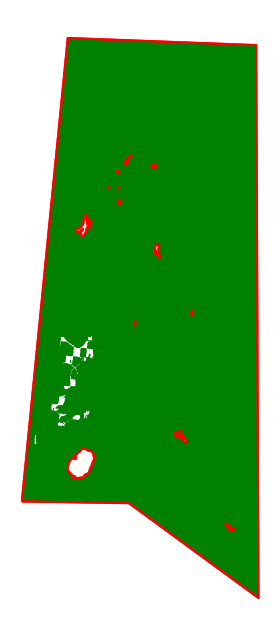

In [124]:
import matplotlib.pyplot as plt

# TODO: filter objs to see changes
fig, ax = plt.subplots(figsize=(12, 8))
updated_trees.plot(ax=ax, color='green')
trees_to_update.boundary.plot(ax=ax, color='red')
ax.set_axis_off()
plt.show()

In [138]:
updated_trees.to_file('trees_to_update.geojson')

# Обновление данных в БД

In [1]:
from api.api_models import ObjectResponse
from pydantic import parse_obj_as
import json

In [2]:
with open('trees_to_update.geojson') as inp:
    obj = json.load(inp)
    data = parse_obj_as(ObjectResponse, obj)

In [3]:
len(data.features)

2236

In [ ]:
start_from = 0

In [17]:
from api.request_helper import APIRequestHelper
from tqdm import tqdm

helper = APIRequestHelper("http://192.168.1.62:8888/mapservices/oodb")

batch_size = 1
for i in tqdm(range(start_from, len(data.features), batch_size)):
    save_res = helper.save_object(ObjectResponse(features=data.features[i:i + batch_size]))
    assert save_res == 200, save_res

100%|██████████| 2236/2236 [21:52<00:00,  1.70it/s] 


In [15]:
import geopandas as gpd

In [16]:
gpd.read_file('trees_to_update.geojson').to_file('./data/trees_to_update.shp')

/tmp/ipykernel_17055/4187776282.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gpd.read_file('trees_to_update.geojson').to_file('./data/trees_to_update.shp')


In [33]:
helper.load_object(ids="1718791").features[0]

ObjectResponse(type='FeatureCollection', features=[Feature[Union[Point, Polygon, LineString, MultiLineString, MultiPolygon], ObjectProperties](type='Feature', geometry=Polygon(type='Polygon', coordinates=[[(38.444097299999626, 63.39258550000019), (38.712962099999565, 63.38799580000018), (38.71618019999956, 63.03246470000021), (38.53124759999955, 63.09346460000023), (38.37850609999957, 63.09452800000009), (38.444097299999626, 63.39258550000019)], [(38.66971709999959, 63.07945290000021), (38.675955999999545, 63.07679710000015), (38.67472959999953, 63.07580720000023), (38.67814229999956, 63.07590380000018), (38.68171499999957, 63.07672470000017), (38.682141599999575, 63.077159300000154), (38.67750239999953, 63.07749730000017), (38.672916499999545, 63.07967020000025), (38.66875729999955, 63.08039450000018), (38.66971709999959, 63.07945290000021)], [(38.62072339999959, 63.21410020000019), (38.621215899999605, 63.21422350000021), (38.62138009999954, 63.21498800000009), (38.62299449999955, 63